## Car Prices Project

In [1]:
### importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import missingno as msn

In [2]:
car_data = pd.read_csv('Clean Data_pakwheels.csv')
df = car_data.copy()

In [3]:
df.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [4]:
df['Company Name'].nunique()

31

In [5]:
df['Model Name'].nunique()

196

In [6]:
df['Body Type'].nunique()

6

In [7]:
df['Registration Status'].nunique()

2

In [8]:
df['Transmission Type'].nunique()

2

In [9]:
df['Color'].nunique()

24

In [10]:
df['Assembly'].nunique()

2

<Axes: >

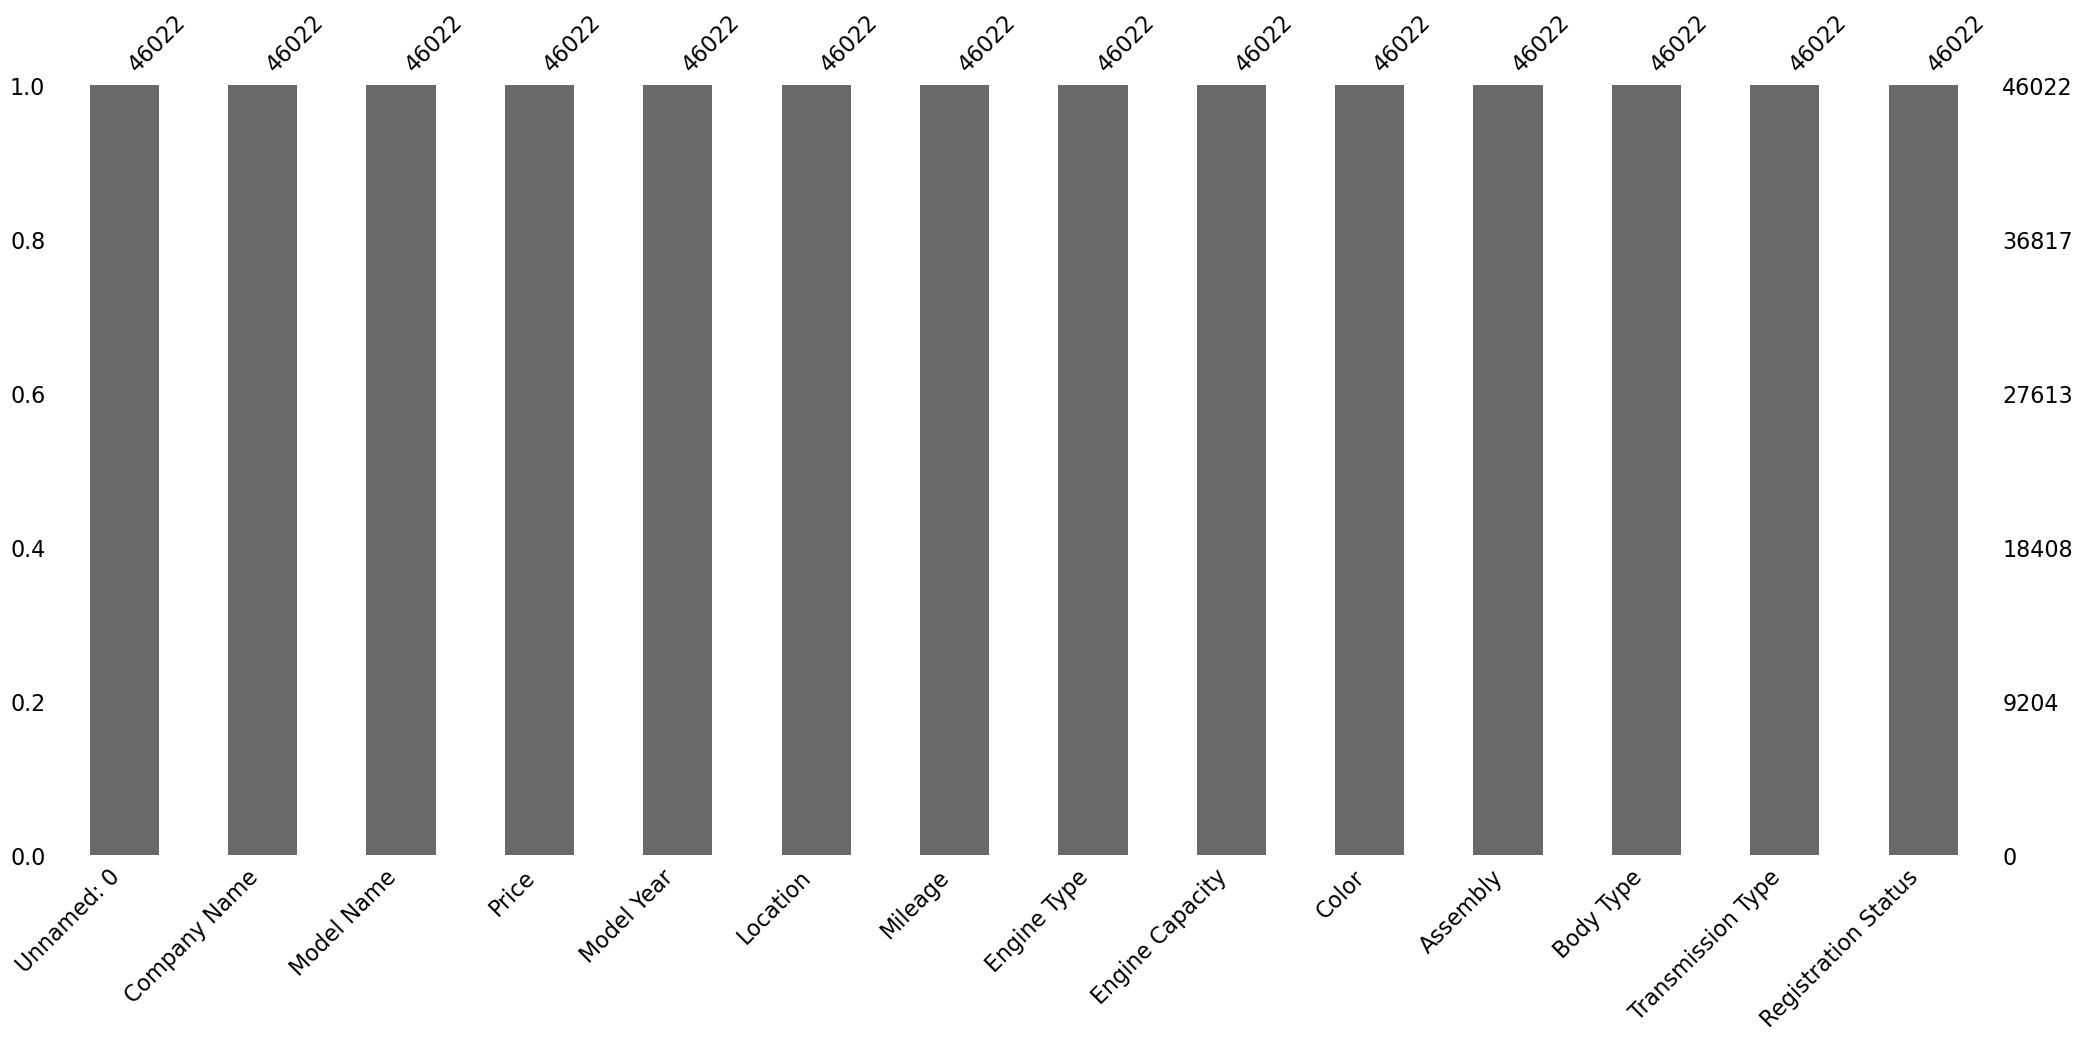

In [11]:
msn.bar(df)

In [12]:
df.corr()

/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_36118/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,Price,Model Year,Mileage,Engine Capacity
Unnamed: 0,1.000000,-0.012383,-0.032425,-0.009007,-0.011992
Price,-0.012383,1.000000,0.217494,-0.188658,0.645924
Model Year,-0.032425,0.217494,1.000000,-0.604310,-0.151290
Mileage,-0.009007,-0.188658,-0.604310,1.000000,0.098138
Engine Capacity,-0.011992,0.645924,-0.151290,0.098138,1.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,46022.0,2.301053e+04,1.328560e+04,0.0,11505.25,23010.5,34515.75,46022.0
Price,46022.0,2.014153e+06,2.939071e+06,111000.0,850000.00,1450000.0,2300000.00,77500000.0
Model Year,46022.0,2.011035e+03,6.399403e+00,1990.0,2007.00,2013.0,2016.00,2019.0
Mileage,46022.0,9.096513e+04,6.365666e+04,1.0,48899.50,80000.0,120000.00,999999.0
Engine Capacity,46022.0,1.313116e+03,6.146908e+02,16.0,1000.00,1300.0,1500.00,6600.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           46022 non-null  int64 
 1   Company Name         46022 non-null  object
 2   Model Name           46022 non-null  object
 3   Price                46022 non-null  int64 
 4   Model Year           46022 non-null  int64 
 5   Location             46022 non-null  object
 6   Mileage              46022 non-null  int64 
 7   Engine Type          46022 non-null  object
 8   Engine Capacity      46022 non-null  int64 
 9   Color                46022 non-null  object
 10  Assembly             46022 non-null  object
 11  Body Type            46022 non-null  object
 12  Transmission Type    46022 non-null  object
 13  Registration Status  46022 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [15]:
## Standart sapma ve diğer değerler birbirne kıyasla çok uçuk Normalizasyon uygulayacağım

In [16]:
df.drop(['Unnamed: 0','Company Name','Location','Color','Model Name','Body Type'],axis=1,inplace=True)

In [17]:
df.head()

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Transmission Type,Registration Status
0,2385000,2017,9869,Petrol,1000,Imported,Automatic,Un-Registered
1,111000,2019,11111,Petrol,1300,Local,Automatic,Registered
2,1530000,2019,17500,Petrol,660,Local,Automatic,Un-Registered
3,1650000,2019,9600,Petrol,660,Local,Manual,Registered
4,1435000,2010,120000,Petrol,1300,Local,Manual,Registered


In [18]:
entype = df['Engine Type']

In [19]:
entype.value_counts()

Petrol    43590
Hybrid     1439
Diesel      993
Name: Engine Type, dtype: int64

In [20]:
entype[6]

'Petrol'

In [21]:
def arrange_petrol(dataframe):
    for i in range(len(dataframe)):
        if dataframe[i] =='Petrol':
            dataframe[i] = 0
        elif dataframe[i] =='Hybrid':
            dataframe[i] = 1
        else:
            dataframe[i] = 2
            
    return dataframe

In [22]:
adjusted_engine=arrange_petrol(entype)

/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_36118/1910819912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[i] = 0
/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_36118/1910819912.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[i] = 2
/var/folders/gf/f54qhm4d7mb1zzqch8zq5q8w0000gn/T/ipykernel_36118/1910819912.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[i] = 1


In [23]:
adjusted_engine.value_counts()

0    43590
1     1439
2      993
Name: Engine Type, dtype: int64

In [24]:
entype[5000]

0

In [25]:
adjusted_engine.head()

0    0
1    0
2    0
3    0
4    0
Name: Engine Type, dtype: object

In [26]:
df['EngineT'] = adjusted_engine

In [27]:
df.head()

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Transmission Type,Registration Status,EngineT
0,2385000,2017,9869,0,1000,Imported,Automatic,Un-Registered,0
1,111000,2019,11111,0,1300,Local,Automatic,Registered,0
2,1530000,2019,17500,0,660,Local,Automatic,Un-Registered,0
3,1650000,2019,9600,0,660,Local,Manual,Registered,0
4,1435000,2010,120000,0,1300,Local,Manual,Registered,0


In [28]:
df.head()

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Transmission Type,Registration Status,EngineT
0,2385000,2017,9869,0,1000,Imported,Automatic,Un-Registered,0
1,111000,2019,11111,0,1300,Local,Automatic,Registered,0
2,1530000,2019,17500,0,660,Local,Automatic,Un-Registered,0
3,1650000,2019,9600,0,660,Local,Manual,Registered,0
4,1435000,2010,120000,0,1300,Local,Manual,Registered,0


In [29]:
df[df['EngineT']==2]

,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Transmission Type,Registration Status,EngineT
8,2650000,1998,110000,2,3000,Imported,Automatic,Registered,2
17,8650000,2018,35000,2,2800,Local,Automatic,Registered,2
97,2700000,1994,117000,2,4200,Imported,Automatic,Registered,2
150,1020000,2003,100000,2,2000,Local,Manual,Registered,2
280,4500000,2001,117000,2,4164,Imported,Automatic,Registered,2
...,...,...,...,...,...,...,...,...,...
45749,1200000,2002,100000,2,2000,Local,Manual,Registered,2
45842,1050000,2007,80000,2,2000,Local,Manual,Registered,2
45931,1150000,2009,133455,2,2000,Local,Automatic,Registered,2
45944,1350000,1993,252000,2,3000,Imported,Manual,Registered,2


In [30]:
df.drop(['Engine Type'],axis=1,inplace=True)

In [31]:
df['Assembly'] = (df['Assembly'] =='Local').astype(int)
df['Registration Status'] = (df['Registration Status'] =='Manual').astype(int)
df['Transmission Type'] = (df['Transmission Type'] =='Registered').astype(int)

In [32]:
df.head()

,Price,Model Year,Mileage,Engine Capacity,Assembly,Transmission Type,Registration Status,EngineT
0,2385000,2017,9869,1000,0,0,0,0
1,111000,2019,11111,1300,1,0,0,0
2,1530000,2019,17500,660,1,0,0,0
3,1650000,2019,9600,660,1,0,0,0
4,1435000,2010,120000,1300,1,0,0,0


In [33]:
df['Model Year'].nunique()

30

In [34]:
df['Model Year'].min()

1990

In [35]:
df['Model Year'] = df['Model Year'] - 1989

In [36]:
df['Model Year'].max()
df['Model Year'].min()

1

In [37]:
### Tamam şimdi Görseleştiricem

In [38]:
df.columns[1:]

Index(['Model Year', 'Mileage', 'Engine Capacity', 'Assembly',
       'Transmission Type', 'Registration Status', 'EngineT'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


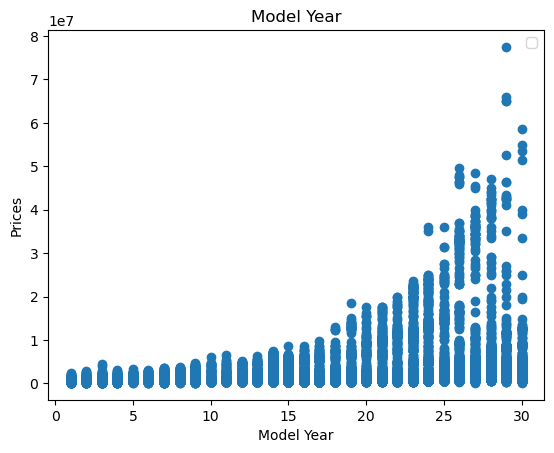

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


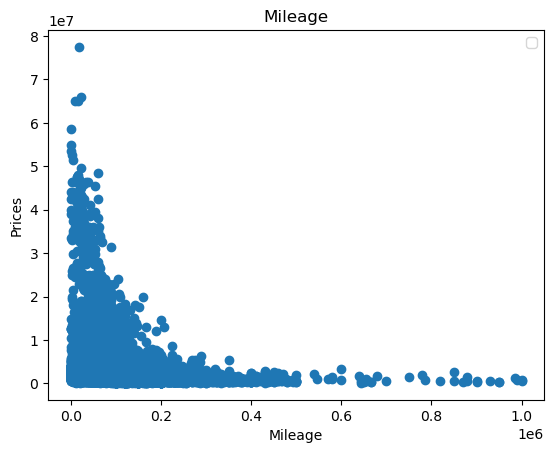

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


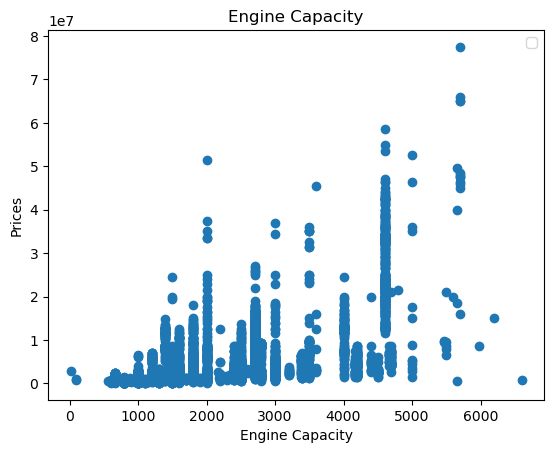

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


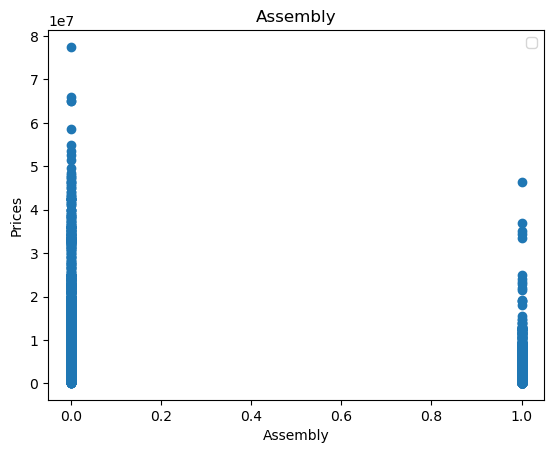

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


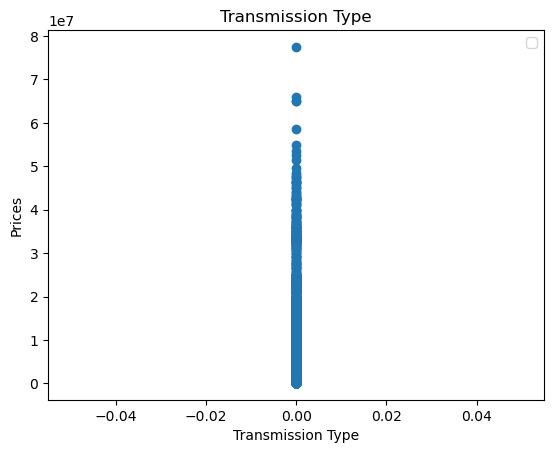

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


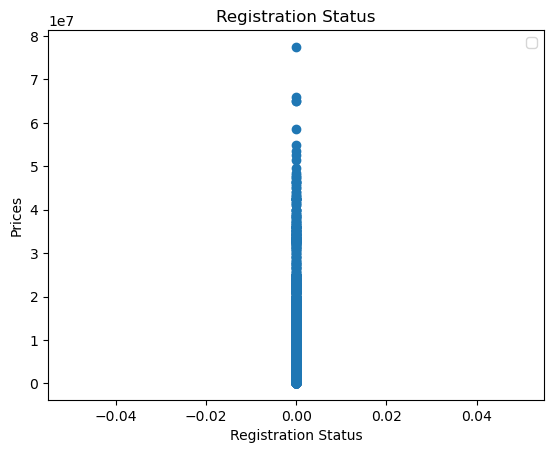

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


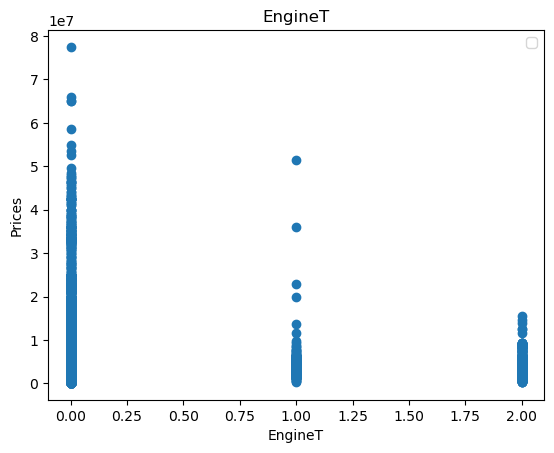

In [39]:
for label in df.columns[1:]:
    plt.scatter(df[label],df['Price'])
    plt.title(label)
    plt.ylabel('Prices')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [40]:
### YIL , MİLE VE ENGİNE CAP (dışında diğer değişkenlerin çok da bir etkisi olduğunu göremiyorum)

In [41]:
### Gerçi kategorik oldukları için aslında anlaşılıyor 

In [42]:
df.head()

,Price,Model Year,Mileage,Engine Capacity,Assembly,Transmission Type,Registration Status,EngineT
0,2385000,28,9869,1000,0,0,0,0
1,111000,30,11111,1300,1,0,0,0
2,1530000,30,17500,660,1,0,0,0
3,1650000,30,9600,660,1,0,0,0
4,1435000,21,120000,1300,1,0,0,0


### ML 

In [43]:
### öncelikle sade linear Regression deneyeceğim 

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [45]:
X= df.drop(['Price'],axis=1)
y= df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
lr = LinearRegression()

In [47]:
model = lr.fit(X_train,y_train)
pred = model.predict(X_test)

In [48]:
print(mean_absolute_error(y_test,pred))

890629.894879536


In [49]:
model.score(X_test,y_test)

0.5472158080418006

TENSOR FLOW

In [66]:
#normalizer = tf.keras.layers.Normalization(
 #            input_shape = (7,))
#normalizer.adapt(X_train)


#Aldığım Hatayı çözümleyemedim

In [67]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
X_test= np.asarray(X_test).astype('float32')

normalizer = tf.keras.layers.Normalization(input_shape = (7,) ,axis=None)
normalizer.adapt(X_train)



nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(rate = 0.01),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(rate = 0.01),
    tf.keras.layers.Dense(1)
    
])
nn_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate = 0.01),loss = 'mean_squared_error')


history= nn_model.fit(
            X_train,y_train,
            validation_split=0.2,
            epochs=100)

In [124]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='linear',input_shape=(7,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='linear'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='linear'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1)
])

    nn_model.compile(optimizer = tf.keras.optimizers.legacy.Adam(lr),loss='mean_squared_error')
    history = nn_model.fit(
       X_train,y_train, epochs = epochs,batch_size=batch_size,validation_split=0.2,verbose=0)
    nn_prediction= nn_model.predict(X_test)
    return nn_model,history,nn_prediction

In [ ]:
least_error = float('inf')
least_error_list = []
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1,0.01,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes , dropout {dropout_prob} ,lr {lr} , batch size {batch_size}")
                model = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                least = mean_absolute_error(y_test,nn_prediction)
                least_error_list.append(least)
                if least_error > least:
                    least_error = least
                    
                #least=final_model.score(X_test,y_test)
                #if least_error > least :
                 #   least_error = least
                

16 nodes , dropout 0 ,lr 0.1 , batch size 32
475/475 [==============================] - 0s 182us/step
16 nodes , dropout 0 ,lr 0.1 , batch size 64
475/475 [==============================] - 0s 185us/step
16 nodes , dropout 0 ,lr 0.1 , batch size 128
475/475 [==============================] - 0s 185us/step
16 nodes , dropout 0 ,lr 0.01 , batch size 32
475/475 [==============================] - 0s 183us/step
16 nodes , dropout 0 ,lr 0.01 , batch size 64


In [83]:
#nn_pred=nn_model.predict(X_test)

475/475 [==============================] - 0s 204us/step


In [84]:
#print(mean_absolute_error(y_test,nn_pred))

706752.44


In [85]:
#print(mean_squared_error(y_test,nn_pred))

2296655000000.0


In [86]:
#print(np.sqrt(mean_squared_error(y_test,nn_pred)))

1515471.9


In [120]:
least_error_list

[706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44,
 706752.44]

In [121]:
least_error

706752.44

In [122]:
print(mean_absolute_error(y_test,pred))

890629.894879536


In [123]:
### TensorFlow daha iyi bir iş yapmış gibi gözüküyor